# Laboratorio 2 - Agrupación
Grupo: 
- 21

Integrantes:
- Jhoan Sebastian Sánchez Suarez - 202215911
- Pablo Méndez Morales - 202210379
- Juan Diego Sánchez - 202214625

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import cm
import numpy as np

# Carga de datos

In [2]:
df=pd.read_csv('data/202510_Laboratorio 2 - Agrupación_Customer_Data.csv', encoding='latin1', sep=';')
df.sample(5)

,ID,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
3236,C13237,12653.730130,0.720720,43414.30520,7306.732804,18829.799200,33601.864740,0.784448,0.125700,0.520122,1.087173,105,238,14314.11901,9183.979494,61523.96143,0.311980,9
1560,C11561,13553.069330,0.796629,40740.16370,2969.329151,20715.351830,41853.103270,0.903964,0.121783,0.580067,0.995794,109,248,14223.81912,9916.947736,64946.97255,0.427865,10
8651,C18652,5892.225337,0.181143,26642.04519,34954.963020,2786.544303,15164.123590,0.393010,0.509393,0.878745,0.251526,77,44,13422.04288,26144.274800,42459.77852,0.793553,7
2976,C12977,13030.573710,0.765095,37091.94097,5486.195348,19532.591320,37185.006050,0.745324,0.287657,0.575179,0.915346,104,186,15081.84178,11101.077330,64571.31921,0.295027,9
1548,C11549,4459.636368,0.144719,33293.65743,35302.691780,2308.490154,9327.103208,0.352252,0.511585,0.865110,0.197580,64,133,15989.22431,29125.837340,24351.74368,0.861748,6


# Entendimiento de los datos

## Perfilamiento

In [3]:
df.shape

(8950, 18)

### Completitud

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   8950 non-null   object 
 1   SALDO                8950 non-null   float64
 2   F_SALDO              8950 non-null   float64
 3   COMPRAS              8950 non-null   float64
 4   COMPRAS_PUNTUALES    8950 non-null   float64
 5   COMPRAS_PLAZOS       8950 non-null   float64
 6   AVANCE_EFECTIVO      8950 non-null   float64
 7   F_COMPRAS            8950 non-null   float64
 8   F_COMPRAS_PUNTUALES  8950 non-null   float64
 9   F_COMPRAS_PLAZOS     8950 non-null   float64
 10  F_AVANCE_EFECTIVO    8950 non-null   float64
 11  P_AVANCE_EFECTIVO    8950 non-null   int64  
 12  P_COMPRAS            8950 non-null   int64  
 13  LÍMITE_CREDITO       8949 non-null   float64
 14  PAGOS                8950 non-null   float64
 15  PAGOS_MINIMOS        8637 non-null   f

In [5]:
df.isnull().sum()

ID                       0
SALDO                    0
F_SALDO                  0
COMPRAS                  0
COMPRAS_PUNTUALES        0
COMPRAS_PLAZOS           0
AVANCE_EFECTIVO          0
F_COMPRAS                0
F_COMPRAS_PUNTUALES      0
F_COMPRAS_PLAZOS         0
F_AVANCE_EFECTIVO        0
P_AVANCE_EFECTIVO        0
P_COMPRAS                0
LÍMITE_CREDITO           1
PAGOS                    0
PAGOS_MINIMOS          313
F_PAGOS_COMPLETOS        0
MESES_CLIENTE            0
dtype: int64

Se observan los datos para la completitud

In [6]:
df[df['LÍMITE_CREDITO'].isnull()]

,ID,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
2223,C12224,5386.597701,0.195623,31058.11769,38490.60757,5292.917978,7599.445162,0.468313,0.421218,0.915907,0.242276,77,67,NaN,22641.87163,31840.28183,0.840785,6


In [7]:
df[df['PAGOS_MINIMOS'].isnull()]

,ID,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
2,C10003,4305.572068,0.176531,28392.953340,36009.470090,2873.383232,14294.18503,0.419764,0.523662,0.899912,0.207049,72,81,15515.586210,27111.360490,NaN,0.829074,6
31,C10032,3310.590886,0.599920,31427.680340,29692.273750,9395.804625,12119.27183,0.241004,0.759244,0.192674,1.353220,28,307,27471.470630,42788.566250,NaN,0.748458,11
45,C10046,14893.094970,0.754369,43348.871500,7196.968679,20440.098640,36786.55161,0.758416,0.211381,0.501564,0.828791,89,183,16223.672510,8064.315833,NaN,0.377104,10
53,C10054,13030.318170,0.767215,41541.292300,4084.981848,19163.859250,37746.28868,0.854852,0.244613,0.493249,1.065783,97,244,11722.581050,12306.438970,NaN,0.433215,10
78,C10079,3514.910807,0.181879,28067.685300,35318.373000,2660.913729,12034.56947,0.451773,0.494646,0.791138,0.143462,80,65,17314.285730,28487.355700,NaN,0.866448,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8922,C18923,2712.167972,0.282046,28536.331890,35580.354640,4425.331588,18613.02233,0.359371,0.575407,0.860808,0.408806,82,72,14918.052730,21416.015690,NaN,0.920035,6
8929,C18930,6039.746284,0.223305,32230.694630,34187.764740,3450.289051,10161.10731,0.467539,0.569357,0.810294,0.124760,80,97,13346.607000,26226.982450,NaN,0.816095,6
8934,C18935,3907.309029,0.229597,30254.878710,31994.886640,3183.752172,12765.06700,0.406941,0.659441,0.844801,0.276053,74,84,16760.975030,24010.894490,NaN,0.858690,6
8938,C18939,16551.038470,0.099458,8163.267932,33988.691350,10175.408990,16704.32565,0.603985,0.656120,0.750198,1.016616,46,146,1852.802394,17727.359190,NaN,0.165054,8


In [8]:
# Se eliminan por ahora

df_trabajo=df.dropna(subset=['LÍMITE_CREDITO', 'PAGOS_MINIMOS'])

In [9]:
df_trabajo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   8636 non-null   object 
 1   SALDO                8636 non-null   float64
 2   F_SALDO              8636 non-null   float64
 3   COMPRAS              8636 non-null   float64
 4   COMPRAS_PUNTUALES    8636 non-null   float64
 5   COMPRAS_PLAZOS       8636 non-null   float64
 6   AVANCE_EFECTIVO      8636 non-null   float64
 7   F_COMPRAS            8636 non-null   float64
 8   F_COMPRAS_PUNTUALES  8636 non-null   float64
 9   F_COMPRAS_PLAZOS     8636 non-null   float64
 10  F_AVANCE_EFECTIVO    8636 non-null   float64
 11  P_AVANCE_EFECTIVO    8636 non-null   int64  
 12  P_COMPRAS            8636 non-null   int64  
 13  LÍMITE_CREDITO       8636 non-null   float64
 14  PAGOS                8636 non-null   float64
 15  PAGOS_MINIMOS        8636 non-null   float6

In [10]:
df_trabajo.describe()

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,9383.315225,0.458869,30506.644432,22919.437163,11402.867473,22572.448971,0.559650,0.478428,0.624101,0.734601,76.166975,164.886174,14690.792408,19819.133774,44224.411642,0.545337,8.369152
std,5120.278788,0.282995,11043.384680,13567.922117,7086.859792,12588.448346,0.213905,0.221663,0.208025,0.422409,22.237366,71.263041,5526.888941,11064.989216,15468.635869,0.267686,1.755631
min,0.000000,0.000000,0.000000,916.121374,0.000000,0.000000,0.000000,0.031308,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,1006.064965,0.000000,6.000000
25%,4274.662323,0.188398,27104.936342,6700.821865,3737.123061,10953.982467,0.407487,0.251875,0.518437,0.230676,65.000000,97.000000,13485.387555,9321.637941,31571.869243,0.336445,7.000000
50%,12012.129670,0.305396,30920.065455,31014.788550,10826.957970,19471.666280,0.504715,0.533603,0.607608,0.947896,82.000000,176.000000,14945.262580,21364.638450,48786.419665,0.432607,8.000000
75%,13743.718880,0.756067,39808.933265,34490.217572,19131.456735,36151.178305,0.777007,0.648637,0.814979,1.028778,92.000000,216.000000,16263.164765,25212.785518,57761.830637,0.815615,10.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


#### Visualización

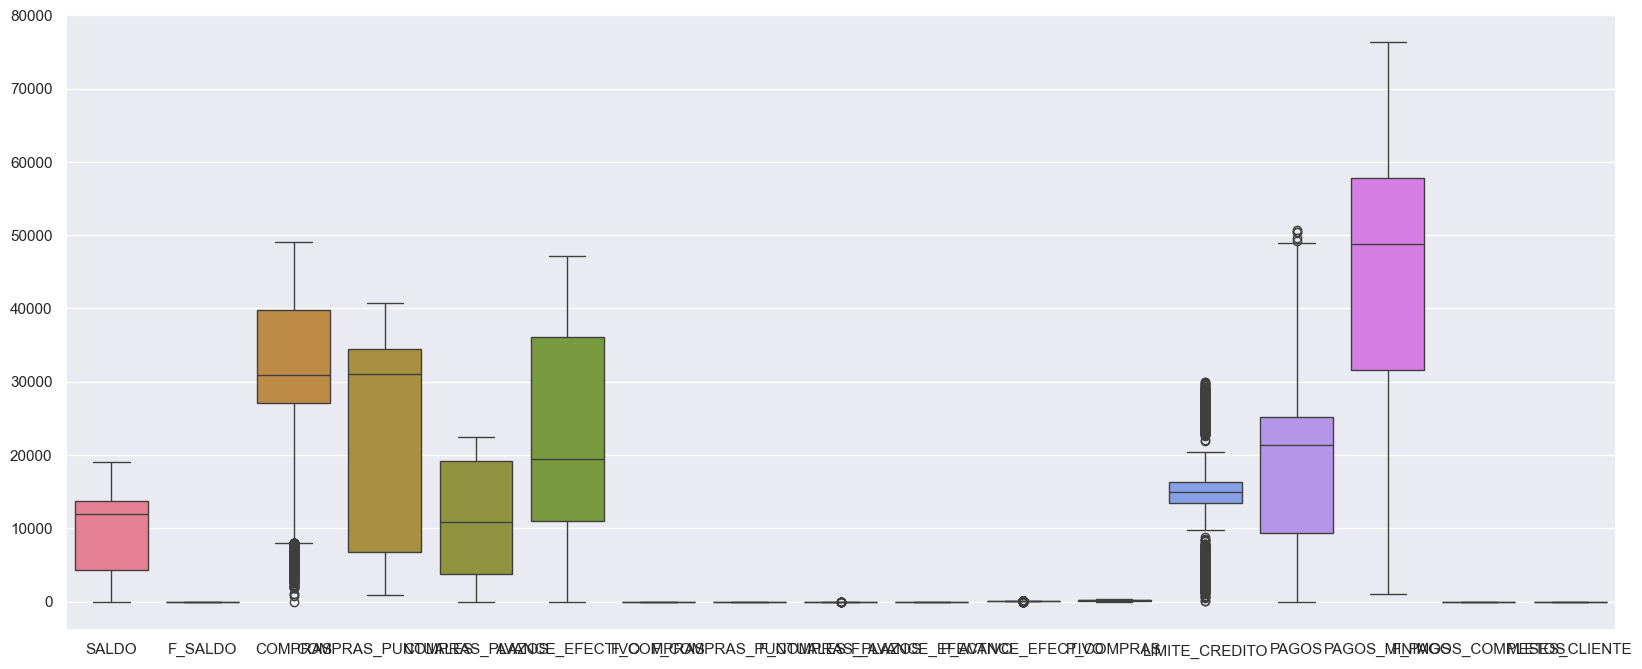

In [11]:
fig= plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_trabajo, orient="v")

Se filtran por los más cercanos en dominio

In [12]:
a=df_trabajo.columns.drop(['ID','MESES_CLIENTE','SALDO','COMPRAS','COMPRAS_PUNTUALES','AVANCE_EFECTIVO','COMPRAS_PLAZOS','P_AVANCE_EFECTIVO', 'P_COMPRAS', 'LÍMITE_CREDITO', 'PAGOS', 'PAGOS_MINIMOS' ])
b=df_trabajo.columns.drop(list(a)).drop(['ID', 'MESES_CLIENTE','P_AVANCE_EFECTIVO', 'P_COMPRAS'])
c=df_trabajo.columns.drop(list(a)).drop(list(b)).drop(['ID','MESES_CLIENTE'])

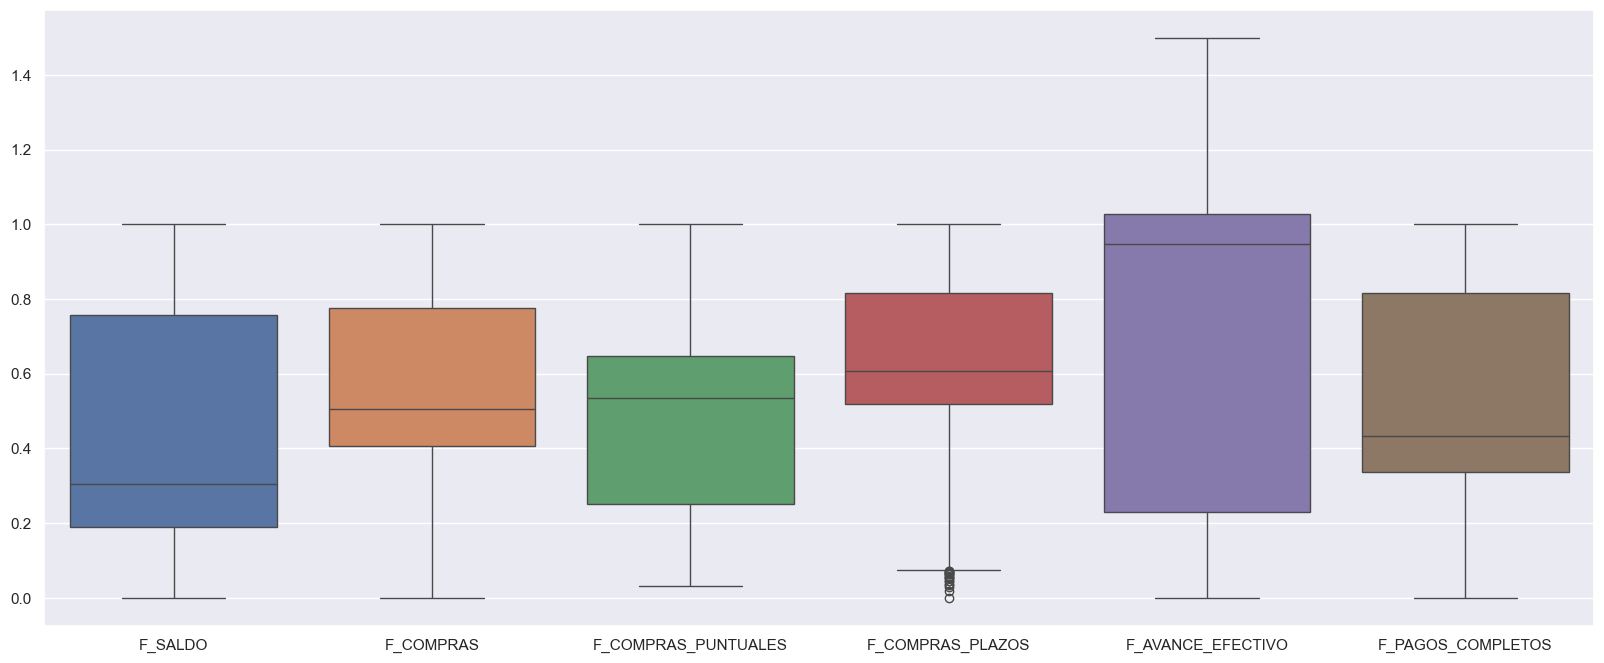

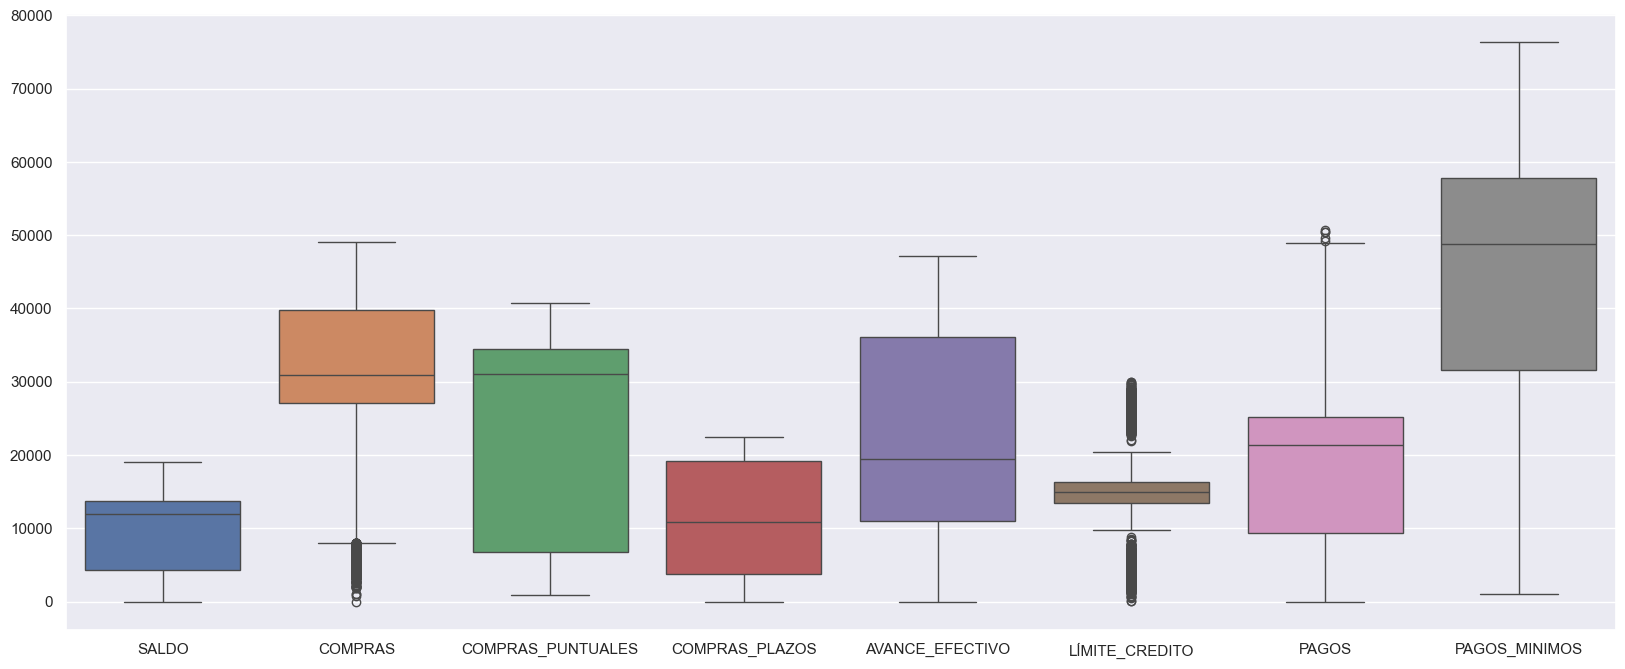

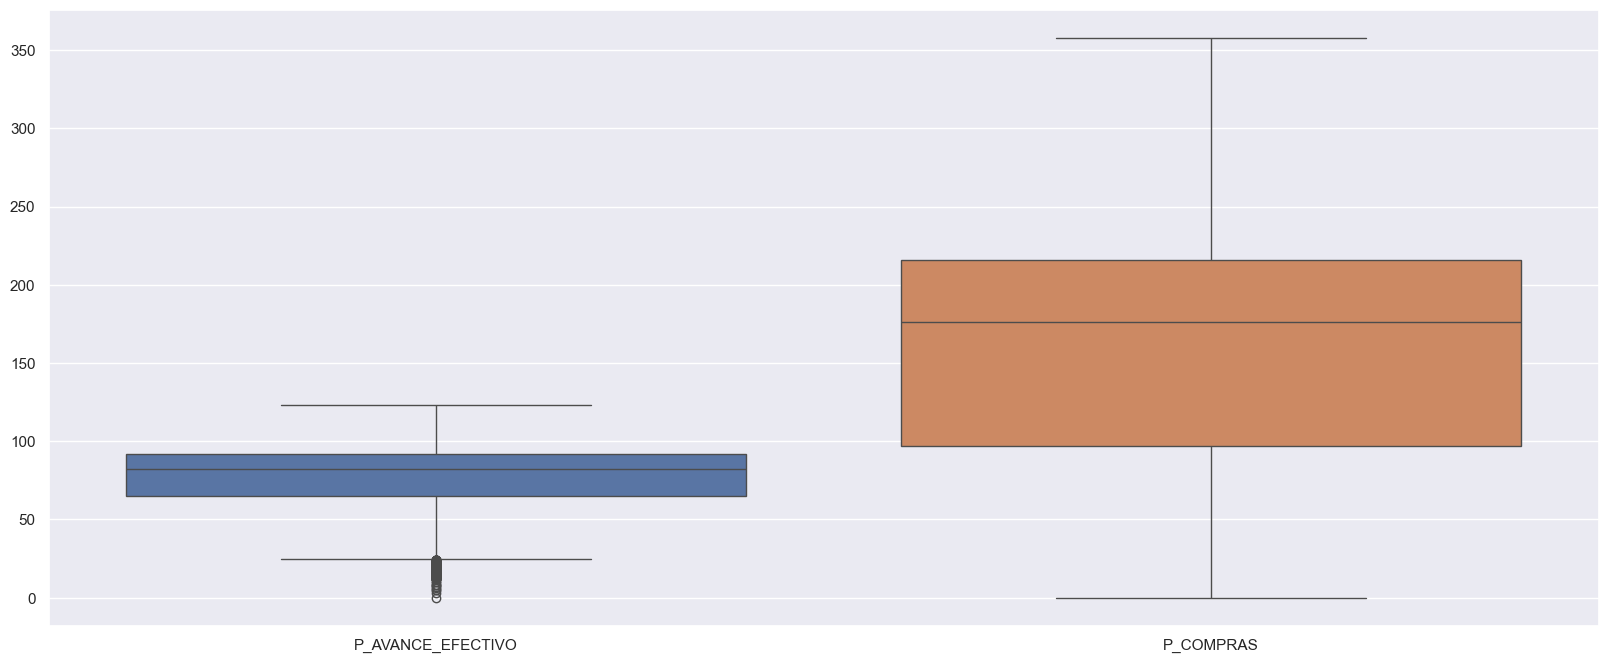

In [13]:
#Visualización de todas las variables numéricas
fig= plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_trabajo[a], orient="v")
plt.show()
fig= plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_trabajo[b], orient="v")
plt.show()
fig= plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_trabajo[c], orient="v")


<Axes: xlabel='MESES_CLIENTE'>

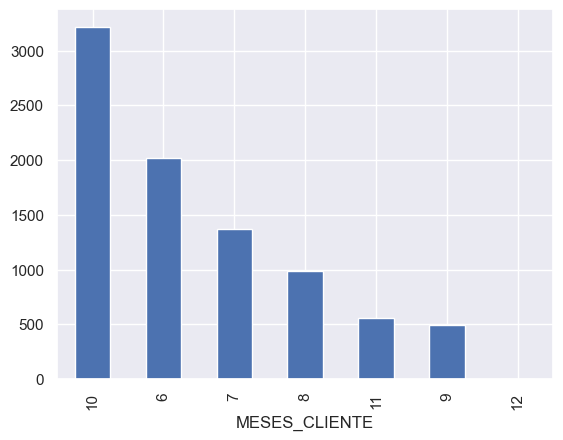

In [14]:
# Cómo se ven los meses
df_trabajo['MESES_CLIENTE'].value_counts().plot(kind='bar')

### Duplicados

In [15]:
df_trabajo.duplicated().sum()

0

In [16]:
df_trabajo.duplicated(subset=['ID']).sum()

0

In [17]:
df_trabajo

,ID,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
0,C10001,5323.148883,0.250693,26344.072200,38237.442520,3727.113162,15708.239680,0.496536,0.464442,0.821611,0.194502,100,77,16819.480040,21337.027460,39452.95812,0.817907,7
1,C10002,12726.638120,0.791307,37958.519020,5690.742440,18733.810960,38284.354430,0.699457,0.250327,0.654863,1.083902,78,156,15617.570580,8000.183624,63013.74848,0.343119,9
3,C10004,4740.988511,0.178076,27399.003840,38246.863490,3402.853375,6936.812518,0.439666,0.606597,0.783129,0.228299,78,83,12926.587970,23919.113400,38444.21998,0.883984,7
4,C10005,13820.920640,0.826914,42214.021630,7341.007821,19273.070990,40091.347850,0.821412,0.283579,0.501361,1.106350,88,182,14404.705070,6994.688474,62041.61734,0.383186,10
5,C10006,12439.064890,0.706673,40674.226120,6156.208831,19401.475610,32438.912700,0.836764,0.343936,0.527813,0.970693,103,216,14554.911550,8814.239865,58227.56469,0.398377,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C18946,6095.221156,0.234346,27094.007820,35917.204380,3463.821376,11711.578890,0.469832,0.539477,0.828321,0.191030,75,101,17623.810280,23954.396950,34841.82989,0.866856,7
8946,C18947,12682.575820,0.686025,38433.618850,5293.541956,18924.799800,34444.867320,0.710331,0.276426,0.546059,0.935152,95,170,12433.814930,7375.625322,66726.37299,0.306600,10
8947,C18948,16464.311410,0.189136,4296.196384,32554.759640,11231.500430,15214.671560,0.424665,0.746010,0.690380,1.063788,51,151,3307.587117,22947.759220,54761.96221,0.129242,8
8948,C18949,15531.883780,0.117118,12219.325650,31795.971700,12390.432130,13856.393210,0.450670,0.805140,0.608737,1.058548,61,178,6148.232910,21369.503520,50368.30906,0.087448,8


# Algoritmo 1 - KMeans

Algoritmo de Jhoan Sebastian Sánchez - 202215911

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

Debido a que KMeans calcula distancias para agrupar los datos, para evitar que las unidades de mayor magnitud tengan más fuerza sobre el algoritmo se estandarizo con MinMaxScaler el cual transforma el valor maximo en esa columna en 1 y el valor minimo en 0.

In [19]:
df_kmeans = df_trabajo.copy(True)
df_kmeans = df_kmeans.drop('ID', axis=1)
scaler = MinMaxScaler(feature_range=(0,1))
df_kmeans_s = df_kmeans.copy(True)
scaling = scaler.fit_transform(df_kmeans_s)
df_kmeans_s = pd.DataFrame(scaling, columns=df_kmeans.columns)
df_kmeans_s

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
0,0.279531,0.250693,0.537200,0.936660,0.165649,0.333245,0.496536,0.447133,0.821611,0.129668,0.813008,0.215084,0.559916,0.420670,0.509905,0.817907,0.166667
1,0.668306,0.791307,0.774039,0.119829,0.832614,0.812190,0.699457,0.226097,0.654863,0.722601,0.634146,0.435754,0.519785,0.157728,0.822382,0.343119,0.500000
2,0.248960,0.178076,0.558712,0.936896,0.151238,0.147162,0.439666,0.593883,0.783129,0.152199,0.634146,0.231844,0.429936,0.471578,0.496526,0.883984,0.166667
3,0.725769,0.826914,0.860815,0.161246,0.856581,0.850524,0.821412,0.260424,0.501361,0.737567,0.715447,0.508380,0.479289,0.137904,0.809489,0.383186,0.666667
4,0.653205,0.706673,0.829416,0.131511,0.862288,0.688181,0.836764,0.322732,0.527813,0.647129,0.837398,0.603352,0.484304,0.173777,0.758904,0.398377,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,0.320074,0.234346,0.552493,0.878428,0.153948,0.248457,0.469832,0.524592,0.828321,0.127354,0.609756,0.282123,0.586772,0.472273,0.448749,0.866856,0.166667
8632,0.665992,0.686025,0.783727,0.109861,0.841102,0.730736,0.710331,0.253040,0.546059,0.623435,0.772358,0.474860,0.413483,0.145414,0.871620,0.306600,0.666667
8633,0.864580,0.189136,0.087607,0.794040,0.499178,0.322774,0.424665,0.737801,0.690380,0.709192,0.414634,0.421788,0.108768,0.452427,0.712942,0.129242,0.333333
8634,0.815616,0.117118,0.249173,0.774997,0.550686,0.293959,0.450670,0.798842,0.608737,0.705698,0.495935,0.497207,0.203614,0.421311,0.654670,0.087448,0.333333


Ya con los datos escalados lo ideal seria calcular los hiperparametros de numero de cluster y la inicializacion del KMeans. Para calcular el cluster usaremos el metodo del codo y para la inicializacion se usara k-means++ en lugar de random ya que este es más estable.

In [20]:
def plot_distortion(data,
                    k_min=1, 
                    k_max=11,
                    ylabel = 'Distortion',
                    xlabel = 'Number of clusters',
                    title = 'Distortion Plot'):
    '''
    Graficar el codo de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    xlabel : string
        La etiqueta del eje x
    ylabel  string
        La etiqueta del eje y    
    title : string
        El titulo de la gráfica  
    '''
    distortions = []
    for i in range(k_min, k_max):
        km = KMeans(n_clusters=i,
                 init='k-means++',
                 n_init=10,
                 max_iter=300,
                 random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)
    plt.plot(range(k_min,k_max), distortions, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

El codo nos indica que el número de clusters más optimo es de 4

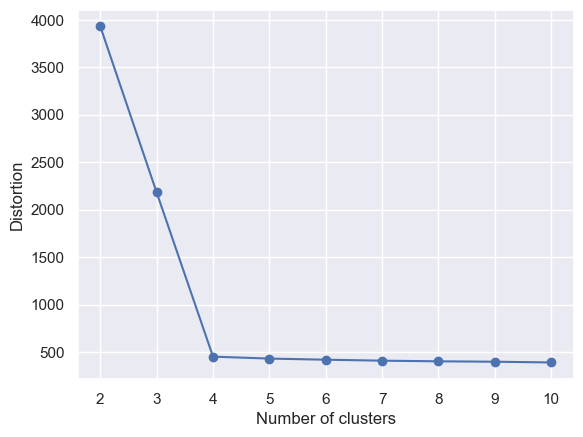

In [21]:
plot_distortion(df_kmeans_s, 2, 11)

In [22]:
def plot_silhouette(data, 
                    labels,
                   ylabel = 'Grupos',
                   xlabel = "Coeficiente de silueta",
                   title = 'Gráfica de silueta'):
    '''
    Graficar la silueta de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    labels : np.array
        El arreglo con las etiquetas correspondientes
    ylabel  string
        La etiqueta del eje y
    xlabel : string
        La etiqueta del eje x
    title : string
        El titulo de la gráfica        
    '''
    cluster_labels = np.unique(labels)
    print(cluster_labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data,
                                        labels,
                                        metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                        c_silhouette_vals,
                        height=1.0,
                        edgecolor='none',
                        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

Se ejecutan el KMeans sobre los datos escalados, pero las etiquetas se ponen sobre los datos sin escalar para que sea más facil analizar las agrupaciones con los valores entregados por el negocio

<Axes: xlabel='Cluster'>

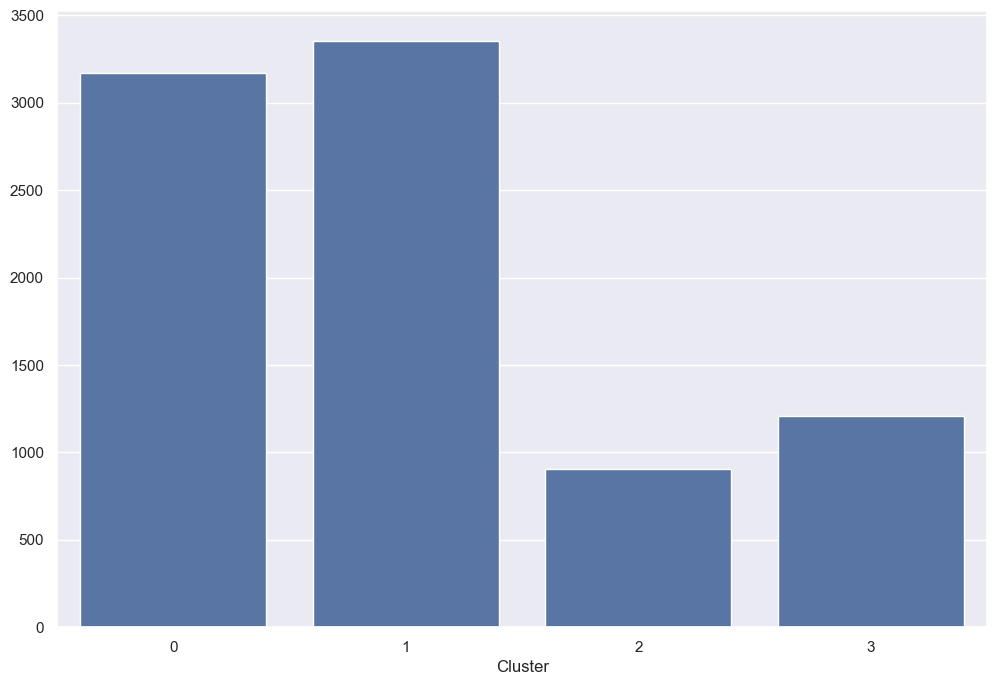

In [84]:
km = KMeans(n_clusters=4, init='k-means++',n_init=10, max_iter=300,random_state=0)
res_kmeans = km.fit(df_kmeans_s)
labels = res_kmeans.labels_
df_kmeans['Cluster'] = labels

cluster_distrib = df_kmeans['Cluster'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b')

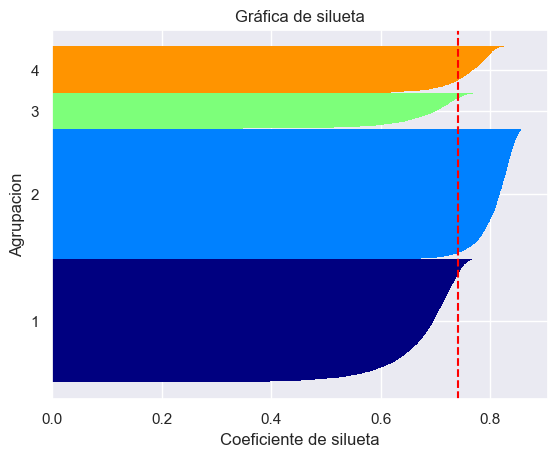

In [85]:
plot_silhouette(data = df_kmeans, 
                labels = res_kmeans.labels_, 
                ylabel = 'Agrupacion')

In [86]:
sil_score = silhouette_score(df_kmeans_s, labels)
print(f"Silhouette Score: {sil_score}")
db_index = metrics.davies_bouldin_score(df_kmeans_s, labels)
ch_index = metrics.calinski_harabasz_score(df_kmeans_s, labels)
print(f"Davies-Bouldin Index: {db_index:.2f}") # similitud promedio entre un cluster y otro , se quiere un 0
print(f"Calinski-Harabasz Index: {ch_index:.2f}") # diferencias entre grupos entre mayor mejor

Silhouette Score: 0.7879166650777724
Davies-Bouldin Index: 0.30
Calinski-Harabasz Index: 55735.63


# Algoritmo 2 - DBSCAN
 Algoritmo de Juan Diego Sánchez

In [26]:
from sklearn.cluster import DBSCAN

In [27]:
df_dbscan = df_trabajo.copy(True)
df_dbscan= df_dbscan.drop('ID', axis=1)
df_dbscan.describe()

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,9383.315225,0.458869,30506.644432,22919.437163,11402.867473,22572.448971,0.559650,0.478428,0.624101,0.734601,76.166975,164.886174,14690.792408,19819.133774,44224.411642,0.545337,8.369152
std,5120.278788,0.282995,11043.384680,13567.922117,7086.859792,12588.448346,0.213905,0.221663,0.208025,0.422409,22.237366,71.263041,5526.888941,11064.989216,15468.635869,0.267686,1.755631
min,0.000000,0.000000,0.000000,916.121374,0.000000,0.000000,0.000000,0.031308,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,1006.064965,0.000000,6.000000
25%,4274.662323,0.188398,27104.936342,6700.821865,3737.123061,10953.982467,0.407487,0.251875,0.518437,0.230676,65.000000,97.000000,13485.387555,9321.637941,31571.869243,0.336445,7.000000
50%,12012.129670,0.305396,30920.065455,31014.788550,10826.957970,19471.666280,0.504715,0.533603,0.607608,0.947896,82.000000,176.000000,14945.262580,21364.638450,48786.419665,0.432607,8.000000
75%,13743.718880,0.756067,39808.933265,34490.217572,19131.456735,36151.178305,0.777007,0.648637,0.814979,1.028778,92.000000,216.000000,16263.164765,25212.785518,57761.830637,0.815615,10.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Normalización

In [28]:
a,b,c

(Index(['F_SALDO', 'F_COMPRAS', 'F_COMPRAS_PUNTUALES', 'F_COMPRAS_PLAZOS',
        'F_AVANCE_EFECTIVO', 'F_PAGOS_COMPLETOS'],
       dtype='object'),
 Index(['SALDO', 'COMPRAS', 'COMPRAS_PUNTUALES', 'COMPRAS_PLAZOS',
        'AVANCE_EFECTIVO', 'LÍMITE_CREDITO', 'PAGOS', 'PAGOS_MINIMOS'],
       dtype='object'),
 Index(['P_AVANCE_EFECTIVO', 'P_COMPRAS'], dtype='object'))

In [29]:
# se normalizan las variables del 0 al 1
for i in df_dbscan.columns:
    maximo=max(df_dbscan[i])
    df_dbscan[i] = df_dbscan[i].apply(lambda x: x/maximo)


### Selección de variables

In [30]:
seleccion=list(a)+list(b)+list(c)
seleccion=pd.Index(seleccion)
seleccion


Index(['F_SALDO', 'F_COMPRAS', 'F_COMPRAS_PUNTUALES', 'F_COMPRAS_PLAZOS',
       'F_AVANCE_EFECTIVO', 'F_PAGOS_COMPLETOS', 'SALDO', 'COMPRAS',
       'COMPRAS_PUNTUALES', 'COMPRAS_PLAZOS', 'AVANCE_EFECTIVO',
       'LÍMITE_CREDITO', 'PAGOS', 'PAGOS_MINIMOS', 'P_AVANCE_EFECTIVO',
       'P_COMPRAS'],
      dtype='object')

In [31]:
df_dbscan.describe()

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,0.492740,0.458869,0.622082,0.562285,0.506794,0.478867,0.559650,0.478428,0.624101,0.489734,0.619244,0.460576,0.489693,0.390744,0.578807,0.545337,0.697429
std,0.268878,0.282995,0.225193,0.332863,0.314972,0.267060,0.213905,0.221663,0.208025,0.281606,0.180792,0.199059,0.184230,0.218152,0.202453,0.267686,0.146303
min,0.000000,0.000000,0.000000,0.022475,0.000000,0.000000,0.000000,0.031308,0.000000,0.000000,0.000000,0.000000,0.001667,0.000000,0.013167,0.000000,0.500000
25%,0.224473,0.188398,0.552716,0.164392,0.166094,0.232385,0.407487,0.251875,0.518437,0.153784,0.528455,0.270950,0.449513,0.183781,0.413211,0.336445,0.583333
50%,0.630785,0.305396,0.630513,0.760889,0.481198,0.413085,0.504715,0.533603,0.607608,0.631931,0.666667,0.491620,0.498175,0.421215,0.638514,0.432607,0.666667
75%,0.721715,0.756067,0.811772,0.846152,0.850287,0.766935,0.777007,0.648637,0.814979,0.685852,0.747967,0.603352,0.542105,0.497083,0.755983,0.815615,0.833333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


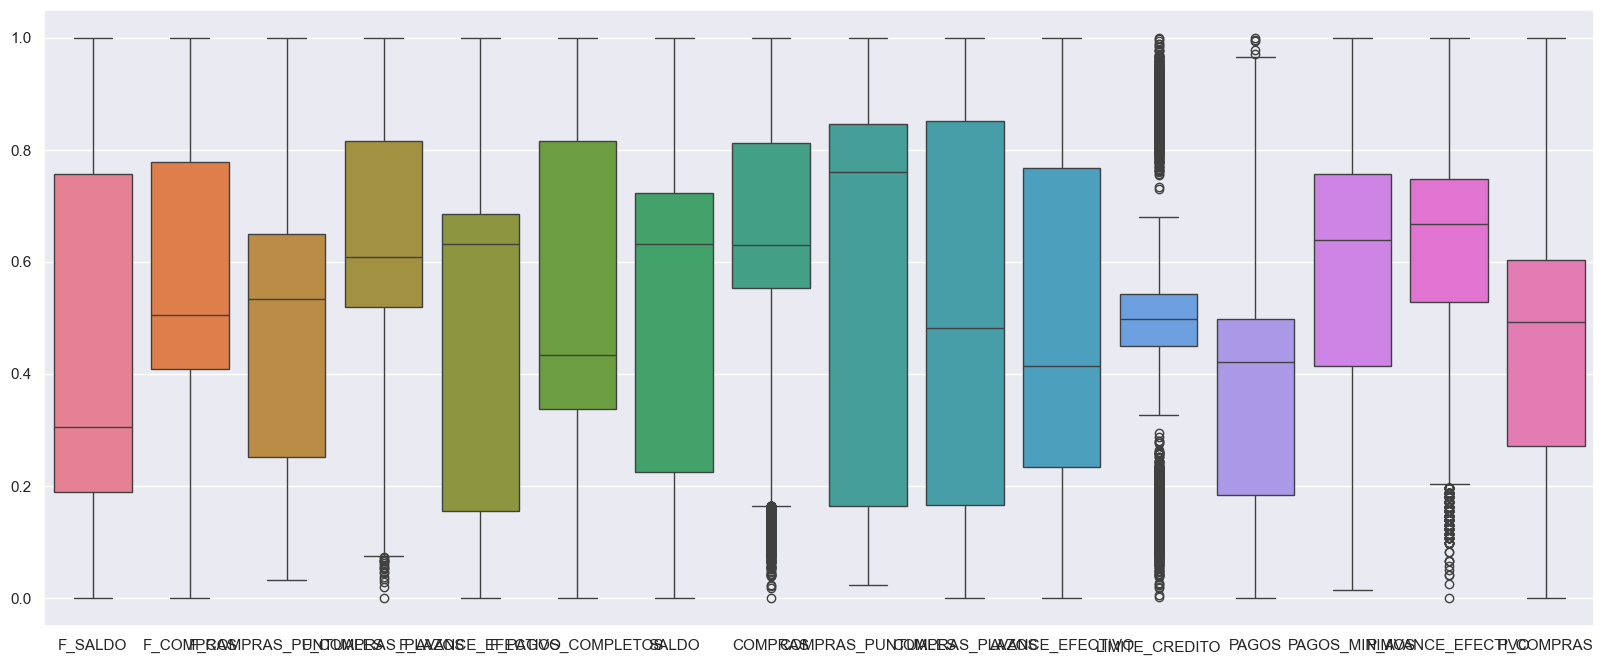

In [32]:
#Visualización de todas las variables numéricas
fig= plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_dbscan[seleccion], orient="v")
plt.show()


In [33]:
seleccion=list(a)+list(b)+list(c)
seleccion=pd.Index(seleccion)
seleccion

Index(['F_SALDO', 'F_COMPRAS', 'F_COMPRAS_PUNTUALES', 'F_COMPRAS_PLAZOS',
       'F_AVANCE_EFECTIVO', 'F_PAGOS_COMPLETOS', 'SALDO', 'COMPRAS',
       'COMPRAS_PUNTUALES', 'COMPRAS_PLAZOS', 'AVANCE_EFECTIVO',
       'LÍMITE_CREDITO', 'PAGOS', 'PAGOS_MINIMOS', 'P_AVANCE_EFECTIVO',
       'P_COMPRAS'],
      dtype='object')

In [34]:
dbscan_model = DBSCAN()
dbscan_model.fit(df_dbscan[seleccion])


DBSCAN()

In [35]:
import numpy as np

In [36]:
dbscan_result = dbscan_model.fit_predict(df_dbscan[seleccion])
dbscan_clusters = np.unique(dbscan_result)

<Axes: ylabel='Frequency'>

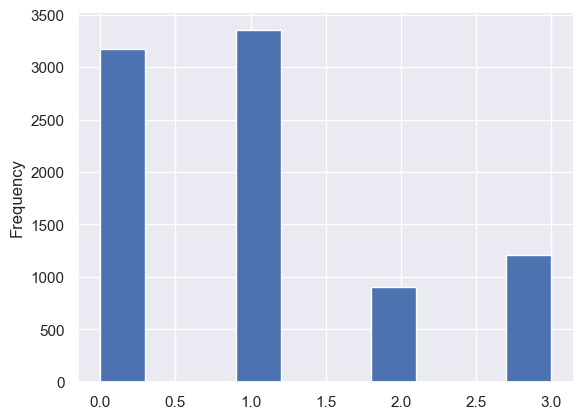

In [38]:
pd.Series(dbscan_result).plot(kind='hist')

In [39]:
df_dbscan['resultados']=dbscan_result

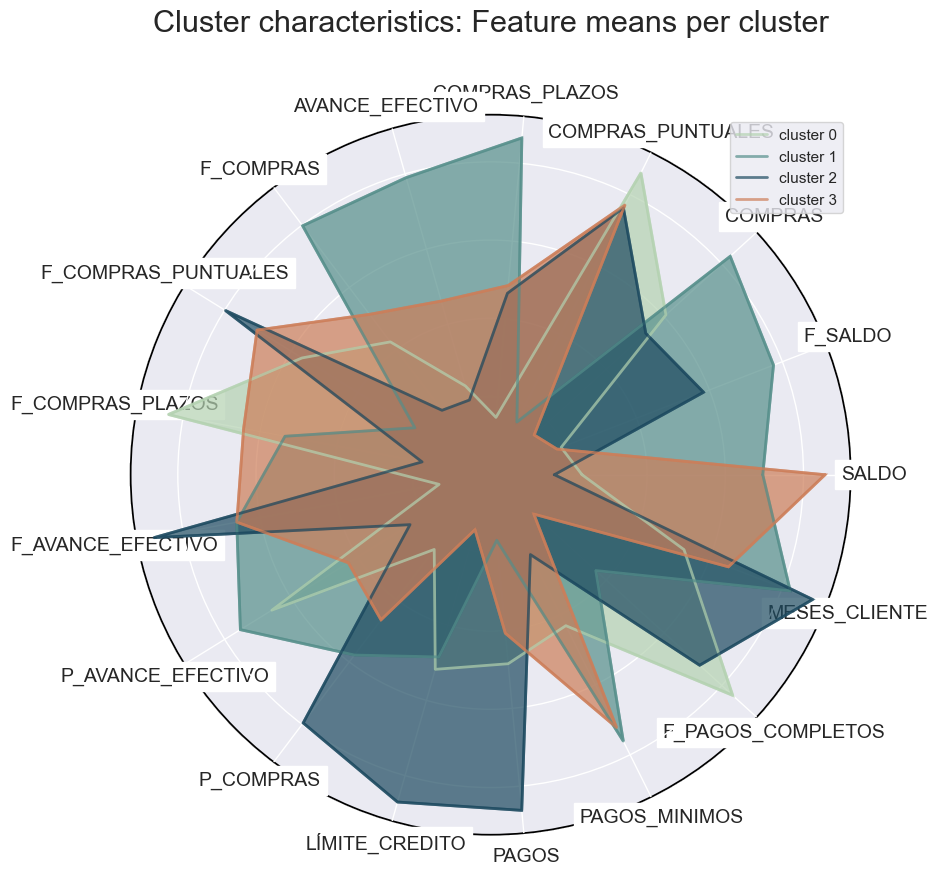

In [42]:
class Radar(object):
    def __init__(self, figure, title, labels, rect=None):
        if rect is None:
            rect = [0.05, 0.05, 0.9, 0.9]

        self.n = len(title)
        self.angles = np.arange(0, 360, 360.0/self.n)
        
        self.axes = [figure.add_axes(rect, projection='polar', label='axes%d' % i) for i in range(self.n)]
        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=title, fontsize=14, backgroundcolor="white",zorder=999) # Feature names
        self.ax.set_yticklabels([])
        
        for ax in self.axes[1:]:
            ax.xaxis.set_visible(False)
            ax.set_yticklabels([])
            ax.set_zorder(-99)

        for ax, angle, label in zip(self.axes, self.angles, labels):
            ax.spines['polar'].set_color('black')
            ax.spines['polar'].set_zorder(-99)
                     
    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)
        kw['label'] = '_noLabel'
        self.ax.fill(angle, values,*args,**kw)
feature_names=df_dbscan.columns.drop('resultados')
fig = plt.figure(figsize=(8, 8))
no_features = len(feature_names)
radar = Radar(fig,feature_names, np.unique(df_dbscan.resultados))
cluster_colors = ['#b4d2b1', '#568f8b', '#1d4a60', '#cd7e59', '#ddb247', '#d15252']

X_std_mean = pd.concat([pd.DataFrame(df_dbscan.mean().drop('resultados'), columns=['mean']), 
                   df_dbscan.groupby('resultados').mean().T], axis=1)

for k in range(0,len(np.unique(df_dbscan.resultados))):
    cluster_data = X_std_mean[k].values.tolist()
    radar.plot(cluster_data,  '-', lw=2, color=cluster_colors[k], alpha=0.7, label='cluster {}'.format(k))

radar.ax.legend()
radar.ax.set_title("Cluster characteristics: Feature means per cluster", size=22, pad=60)
plt.show()


In [44]:
sil_score = silhouette_score(df_dbscan, dbscan_result)
print(f"Silhouette Score: {sil_score}")
db_index = metrics.davies_bouldin_score(df_dbscan, dbscan_result)
ch_index = metrics.calinski_harabasz_score(df_dbscan, dbscan_result)
print(f"Davies-Bouldin Index: {db_index:.2f}") # similitud promedio entre un cluster y otro , se quiere un 0
print(f"Calinski-Harabasz Index: {ch_index:.2f}") # diferencias entre grupos entre mayor mejor


Silhouette Score: 0.8507936096174035
Davies-Bouldin Index: 0.22
Calinski-Harabasz Index: 118361.02


# Algoritmo 3 - Affinity Propagation

In [ ]:
from sklearn.cluster import AffinityPropagation

In [ ]:
df_affinity = df_trabajo.copy(True)
df_affinity

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
0,5323.148883,0.250693,26344.072200,38237.442520,3727.113162,15708.239680,0.496536,0.464442,0.821611,0.194502,100,77,16819.480040,21337.027460,39452.95812,0.817907,7
1,12726.638120,0.791307,37958.519020,5690.742440,18733.810960,38284.354430,0.699457,0.250327,0.654863,1.083902,78,156,15617.570580,8000.183624,63013.74848,0.343119,9
3,4740.988511,0.178076,27399.003840,38246.863490,3402.853375,6936.812518,0.439666,0.606597,0.783129,0.228299,78,83,12926.587970,23919.113400,38444.21998,0.883984,7
4,13820.920640,0.826914,42214.021630,7341.007821,19273.070990,40091.347850,0.821412,0.283579,0.501361,1.106350,88,182,14404.705070,6994.688474,62041.61734,0.383186,10
5,12439.064890,0.706673,40674.226120,6156.208831,19401.475610,32438.912700,0.836764,0.343936,0.527813,0.970693,103,216,14554.911550,8814.239865,58227.56469,0.398377,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,6095.221156,0.234346,27094.007820,35917.204380,3463.821376,11711.578890,0.469832,0.539477,0.828321,0.191030,75,101,17623.810280,23954.396950,34841.82989,0.866856,7
8946,12682.575820,0.686025,38433.618850,5293.541956,18924.799800,34444.867320,0.710331,0.276426,0.546059,0.935152,95,170,12433.814930,7375.625322,66726.37299,0.306600,10
8947,16464.311410,0.189136,4296.196384,32554.759640,11231.500430,15214.671560,0.424665,0.746010,0.690380,1.063788,51,151,3307.587117,22947.759220,54761.96221,0.129242,8
8948,15531.883780,0.117118,12219.325650,31795.971700,12390.432130,13856.393210,0.450670,0.805140,0.608737,1.058548,61,178,6148.232910,21369.503520,50368.30906,0.087448,8


In [ ]:
af = AffinityPropagation(random_state=0,damping=0.8).fit(df_affinity[seleccion])
af

AffinityPropagation(damping=0.8, random_state=0)

In [87]:
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)

print(f"Num clusters: {n_clusters_}")
print(f"Cluster_centers: {cluster_centers_indices}")
print(f"Labels: {labels}")

Num clusters: 32
Cluster_centers: [ 303  360  404  592 1632 1749 1876 2342 2739 2826 2934 2989 4183 4550
 4710 4805 4898 5371 5454 5915 6085 6229 6647 6796 6858 7408 7500 7532
 7536 7879 8446 8478]
Labels: [10 26 19 ...  8  8 19]


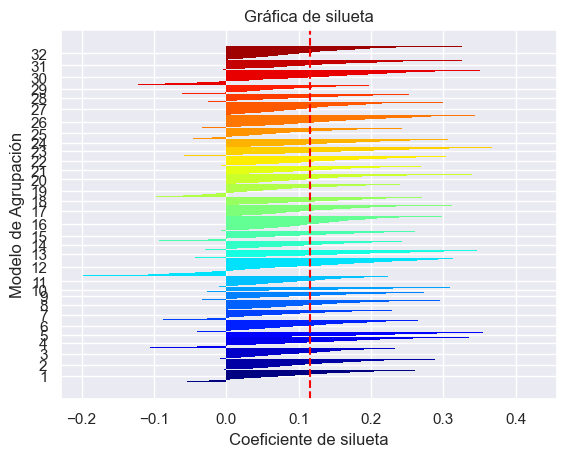

In [88]:
#Función robada
def plot_silhouette(data, 
                    labels,
                   ylabel = 'Grupos',
                   xlabel = "Coeficiente de silueta",
                   title = 'Gráfica de silueta'):
    '''
    Graficar la silueta de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    labels : np.array
        El arreglo con las etiquetas correspondientes
    ylabel  string
        La etiqueta del eje y
    xlabel : string
        La etiqueta del eje x
    title : string
        El titulo de la gráfica        
    '''
    cluster_labels = np.unique(labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data,
                                        labels,
                                        metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                        c_silhouette_vals,
                        height=1.0,
                        edgecolor='none',
                        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()
    
plot_silhouette(data = df_affinity, 
                labels = af.labels_, 
                ylabel = 'Modelo de Agrupación')
    

In [89]:
labels=af.labels_
df_affinity["cluster"] = labels
cluster_distribution = df_affinity["cluster"].value_counts()
cluster_distribution
df_affinity["cluster"]
# sns.pairplot(data=df_affinity,hue=labels)#Barplot

0       10
1       26
3       19
4       30
5       28
        ..
8945    16
8946    29
8947     8
8948     8
8949    19
Name: cluster, Length: 8636, dtype: int64

In [90]:
sil_score = silhouette_score(df_affinity, labels)
print(f"Silhouette Score: {sil_score}")
db_index = metrics.davies_bouldin_score(df_affinity, labels)
ch_index = metrics.calinski_harabasz_score(df_affinity, labels)
print(f"Davies-Bouldin Index: {db_index:.2f}") # similitud promedio entre un cluster y otro , se quiere un 0
print(f"Calinski-Harabasz Index: {ch_index:.2f}") # diferencias entre grupos entre mayor mejor

Silhouette Score: 0.11566204864743423
Davies-Bouldin Index: 1.79
Calinski-Harabasz Index: 11925.99


# Conclusiones

Para elegir la mejor implementación de algoritmo tendremos en cuenta 3 metricas:

*   Silhouette Score: Que mide que tan cercanos son los datos de un mismo cluster y que tan distintos son los clusters entre ellos, los resultados van desde -1 a 1, y entre más cercano a 1 mejor es el modelo.
* Davies-Bouldin Index: El cual mide la similitud promedio entre un cluster y otro, este indice es mejor entre más cercano a 0 es.
* Calinkski-Harabasz Index: Calcula la diferencia entre clusters y entre más grande mejor.

Las metricas de KMeans fueron:

Silhouette Score: 0.7879166650777724
Davies-Bouldin Index: 0.30
Calinski-Harabasz Index: 55735.63

Las metricas de BDSCAN fueron:

Silhouette Score: 0.8507936096174035
Davies-Bouldin Index: 0.22
Calinski-Harabasz Index: 118361.02

Las metricas de Affinity Propgation fueron:

Silhouette Score: 0.11566204864743423
Davies-Bouldin Index: 1.79
Calinski-Harabasz Index: 11925.99

Analizando las metricas individualmente KMeans y BDSCAN tuvieron resultados satisfactorios obteniendo un silhouette score superior al 0.78 y 0.85 respectivamente, y las demás metricas dan razon a estos resultados, por otro lado, Affinity Propagation tuvo metricas no aceptables y por lo tanto no es una implementacion viable para el análisis del negocio.

La mejor implementacion y la recomendad es la implementacion de BDSCAN ya que tuvo las mejores metricas en los tres indicadores si lo comparamos con la otra implementacion aceptable que es la de KMeans.

# Analisis a partir de BDSCAN

Esta grafica de radar fue generada con los resultados del BDSCAN, y genero 4 agrupaciones con los siguientes comportamientos:

* Cluster 0: Se caracterizan por ser los clientes con mayor cantidad de compras puntuales, la mayor frecuencia de compras a plazos y la mayor fecuencia de pagos completos. Tambien cuentan con una alta cantidad de compras realizadas en los ultimos 12 meses, un alto promedio de avances en efectivo, un mediano limite de credito y una mediana frecuencia de compras.

* Cluster 1: Se caracterizan por ser los clientes que compran con mayor frecuencia, que acumulan el mayor importe total de avances en efectivo, el mayor importe total de compras a plazos, el mayor importe total de compras realizadas en los últimos 12 meses, el mayor importe medio por operacion de avance en efectivo y el mayor total de pagos minimos. Ademas es uno de los grupos con clientes con mayor antiguedad. Aedemas es el grupo que menos importe total pagado para reducir el saldo de sus extracto y menos importe total de compras puntuales.

* Cluster 2: Se caracterizan por ser los clientes que tienen mayor limite de credito, mayor importe medio de operacion por compra, mayor cantidad de pagos totales , la mayor frecuencia de avances en efectivo y la mayor antiguedad como cliente. Pero tienen la menor frecuencia de compras, el mayor importe total de avances en efectivo, el menor saldo, el menor total de pagos minimos.

* Cluster 3: Se caracterizan por ser los clientes con mayor saldo medio mensual, hacer gran cantidad de pagos minimos, hacer con frecuencia avances en efectivo y compras puntuales. Tambien son el grupo de clientes con el menor limite de credito y con menor promedio de compras por operacion.

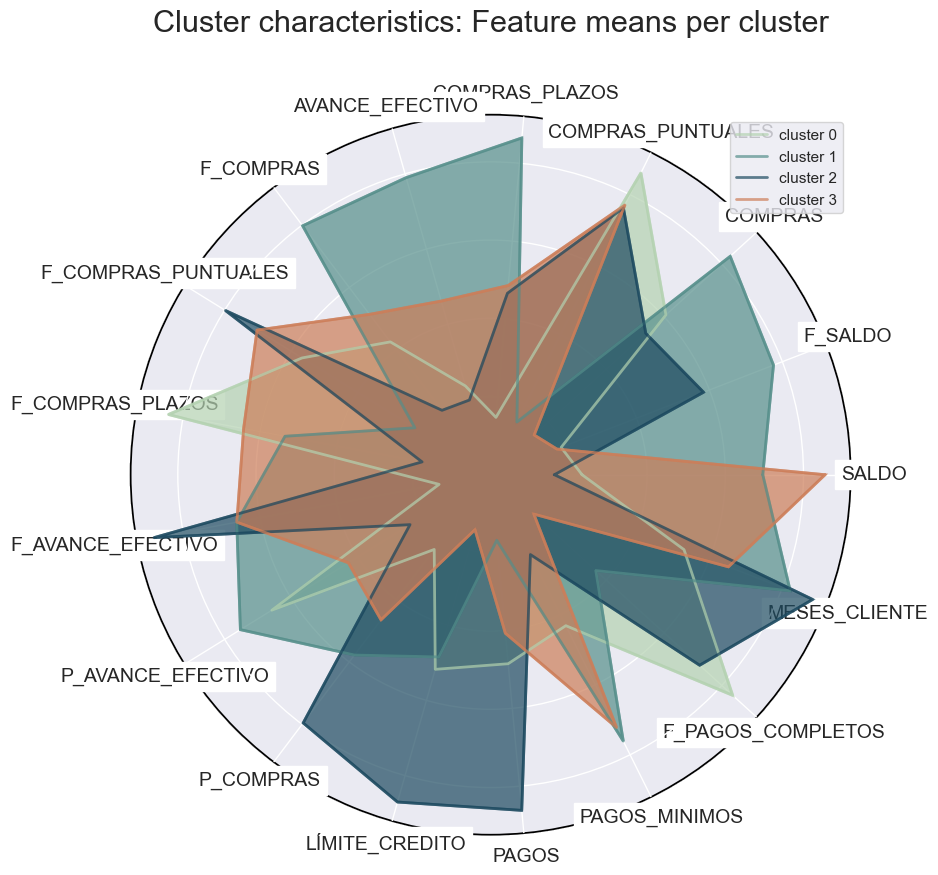

Dado que se pudo caracterizar a los 4 grupos de clientes gracias a los clusters identificados y con diagrama de radar, la calidad del modelo no solo es buena por sus metricas, si no tambien por que es facil caracterizar a los segmentos de clientes creados.
Con toda esa informacion se pueden crear distintas campañas de marketing para cada segmento de clientes, sea uno de los grupos con mayores pagos, limite de credito y antiguedad o clientes con el menor limite de credito y mayor cantidad de saldo.